In [96]:
# The python version I'm using is 3.9.16
! pip install flappy-bird-gymnasium
! pip install tensorflow

'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.


In [97]:
# Run if you wanna play the game, the game is kinda cringe ngl
! flappy_bird_gymnasium

'flappy_bird_gymnasium' is not recognized as an internal or external command,
operable program or batch file.


In [98]:
from __future__ import annotations

from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns
from matplotlib.patches import Patch
from tqdm import tqdm

In [99]:
import flappy_bird_gymnasium
import gymnasium
# env = gymnasium.make("FlappyBird-v0", render_mode="human", use_lidar=False)
env = gymnasium.make("FlappyBird-v0", use_lidar=False)


In [100]:
class FlappyBirdAgent:
    def __init__(
        self,
        learning_rate,
        epsilon,
        discount_factor,
    ):
        """Initialize a Reinforcement Learning agent with specified learning rate, epsilon, and discount factor.
        """
        self.action_values = defaultdict(lambda: np.zeros(env.action_space.n))
        # Feel free to add more class variables needed for your specific policy

        self.lr = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon

        self.training_error = []

    def get_action(self, obs) -> int:
        """
        Implementing epsilon-greedy policy.
        Returns the best action with probability (1 - epsilon)
        otherwise a random action with probability epsilon to ensure exploration.
        """
        # with probability epsilon return a random action to explore the environment
        if np.random.random() < self.epsilon:
            return env.action_space.sample()

        # with probability (1 - epsilon) act greedily (exploit)
        else:
            return int(np.argmax(self.action_values[obs]))

    def update_action_values_ql(
        self,
        obs,
        action,
        reward,
        terminated,
        next_obs,
    ):
        """Updates the Q-value of an action."""
        future_q_value = (not terminated) * np.max(self.action_values[next_obs])
        temporal_difference = (
            reward + self.discount_factor * future_q_value - self.action_values[obs][action]
        )

        self.action_values[obs][action] = (
            self.action_values[obs][action] + self.lr * temporal_difference
        )
        self.training_error.append(temporal_difference)

    # implement the update function for other RL algorithms
    def update_action_values_xyz(
        self,
        obs,
        action,
        reward,
        terminated,
        next_obs, # I think next_obs is only required for SARSA, but I could be wrong so keeping it here to be safe
    ):
        return

In [101]:
# hyperparameters
learning_rate = 0.01
n_episodes = 20
epsilon = 0.3
disount_factor = 0.95

agent = FlappyBirdAgent(
    learning_rate=learning_rate,
    epsilon=epsilon,
    discount_factor=disount_factor
)

In [102]:
for episode in tqdm(range(n_episodes)):
    obs, info = env.reset()
    done = False

    # play one episode
    while not done:
        action = agent.get_action(tuple(obs))
        next_obs, reward, terminated, truncated, info = env.step(action)

        # change this line to call the update function for a different algorithm
        agent.update_action_values_ql(tuple(obs), action, reward, terminated, tuple(next_obs))

        # update if the environment is done and the current obs
        done = terminated or truncated
        obs = next_obs

100%|██████████| 20/20 [00:00<00:00, 383.44it/s]


In [103]:
env2 = gymnasium.make("FlappyBird-v0", render_mode="human", use_lidar=False)


In [104]:
for episode in tqdm(range(n_episodes)):
    obs, info = env2.reset()
    done = False

    # play one episode
    while not done:
        action = agent.get_action(tuple(obs))
        next_obs, reward, terminated, truncated, info = env2.step(action)

    
        done = terminated or truncated
        obs = next_obs

100%|██████████| 20/20 [00:47<00:00,  2.39s/it]


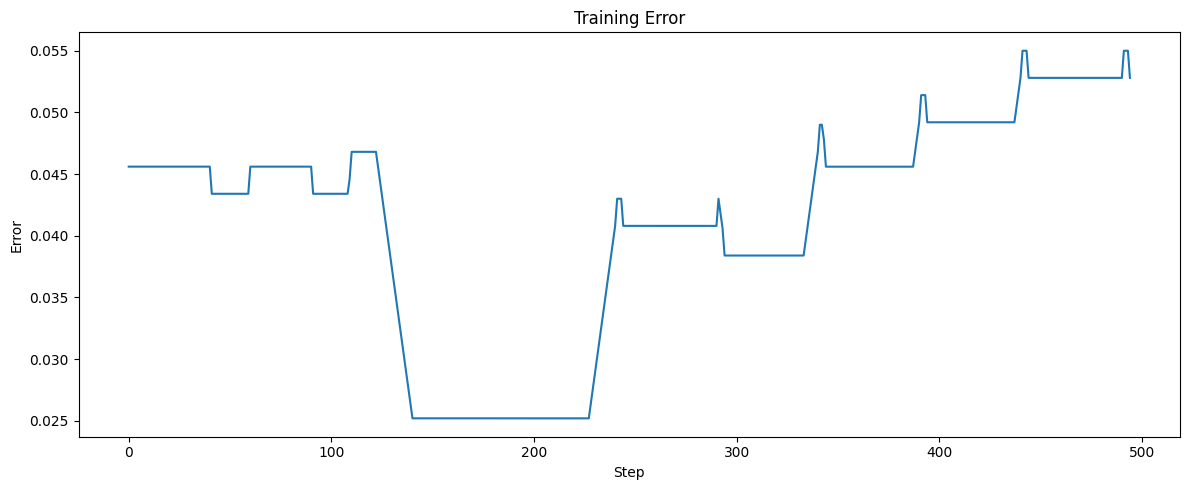

In [105]:
# Visualizing the Training
# Visualize the error 

# rolling length - the number of consecutive data points 
# each point in the graph represents the average of the current and previous 499 points
rolling_length = 500
# initialize the graph
figure, axis = plt.subplots(figsize=(12,5))

plt.title("Training Error")
# calculate the moving average
mov_avg_TE= (np.convolve(np.array(agent.training_error), np.ones(rolling_length), mode="valid") / rolling_length)
plt.plot(range(len(mov_avg_TE)), mov_avg_TE)

#  label the axis
plt.xlabel("Step")
plt.ylabel("Error")

plt.tight_layout()
plt.show()